In [1]:
import os

import numpy as np
import pandas as pd
import datetime as dt
import pandas_profiling
import re as re

import scipy.stats as stats
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocess
import sklearn.feature_selection as feature_selection

import statsmodels as st
import statsmodels.formula.api as smp
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


In [2]:
house = pd.read_csv('House_Prices.csv')

In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
Home            128 non-null int64
Price           128 non-null int64
SqFt            128 non-null int64
Bedrooms        128 non-null int64
Bathrooms       128 non-null int64
Offers          128 non-null int64
Brick           128 non-null object
Neighborhood    128 non-null object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [4]:
house.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [5]:
house.tail()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West
127,128,124600,2250,3,3,4,No,North


In [6]:
house.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [7]:
house.dtypes

Home             int64
Price            int64
SqFt             int64
Bedrooms         int64
Bathrooms        int64
Offers           int64
Brick           object
Neighborhood    object
dtype: object

In [35]:
profile_report = pandas_profiling.ProfileReport(house)

In [36]:
profile_report.to_file('profile_report.html')

In [37]:
pandas_profiling.ProfileReport(house)

In [8]:
house.drop(['Home'], axis=1, inplace=True)

In [9]:
house.columns

Index(['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [10]:
house.drop_duplicates()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,No,East
1,114200,2030,4,2,3,No,East
2,114800,1740,3,2,1,No,East
3,94700,1980,3,2,3,No,East
4,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...
123,119700,1900,3,3,3,Yes,East
124,147900,2160,4,3,3,Yes,East
125,113500,2070,2,2,2,No,North
126,149900,2020,3,3,1,No,West


In [130]:
cat_vars = ['Brick','Neighborhood','Bathrooms','Bedrooms']
con_vars = ['Price', 'SqFt','Offers']

In [131]:
data_nums=house[con_vars]
data_cat=house[cat_vars]

In [132]:
data_nums

,Price,SqFt,Offers
0,114300,1790,2
1,114200,2030,3
2,114800,1740,1
3,94700,1980,3
4,119800,2130,3
...,...,...,...
123,119700,1900,3
124,147900,2160,3
125,113500,2070,2
126,149900,2020,1


In [133]:
data_cat

,Brick,Neighborhood,Bathrooms,Bedrooms
0,No,East,2,2
1,No,East,2,4
2,No,East,2,3
3,No,East,2,3
4,No,East,3,3
...,...,...,...,...
123,Yes,East,3,3
124,Yes,East,3,4
125,No,North,2,2
126,No,West,3,3


In [218]:
#data_cat['Brick']=np.where(data_cat['Brick']=='Yes',1,0)

In [134]:
data_cat

,Brick,Neighborhood,Bathrooms,Bedrooms
0,No,East,2,2
1,No,East,2,4
2,No,East,2,3
3,No,East,2,3
4,No,East,3,3
...,...,...,...,...
123,Yes,East,3,3
124,Yes,East,3,4
125,No,North,2,2
126,No,West,3,3


In [149]:
def removeOutlier(x,quantileValue = .95):    
    x.clip_upper(x.quantile(quantileValue));
    x.clip_lower(x.quantile(round(1.-quantileValue,2)))
    return x

data_nums = data_nums.apply(lambda x:removeOutlier(x,0.95))

In [150]:
data_nums

,Price,SqFt,Offers
0,114300,1790,2
1,114200,2030,3
2,114800,1740,1
3,94700,1980,3
4,119800,2130,3
...,...,...,...
123,119700,1900,3
124,147900,2160,3
125,113500,2070,2
126,149900,2020,1


In [151]:
data_final = pd.concat([data_nums, data_cat], axis=1)

In [152]:
data_final[cat_vars]= data_final[cat_vars].astype(object)

In [153]:
data_final = pd.get_dummies(data_final, ['Brick', 'Neighborhood', 'Bathrooms', 'Bedrooms'], drop_first=True)

In [154]:
data_final

,Price,SqFt,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West,Bathrooms_3,Bathrooms_4,Bedrooms_3,Bedrooms_4,Bedrooms_5
0,114300,1790,2,0,0,0,0,0,0,0,0
1,114200,2030,3,0,0,0,0,0,0,1,0
2,114800,1740,1,0,0,0,0,0,1,0,0
3,94700,1980,3,0,0,0,0,0,1,0,0
4,119800,2130,3,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
123,119700,1900,3,1,0,0,1,0,1,0,0
124,147900,2160,3,1,0,0,1,0,0,1,0
125,113500,2070,2,0,1,0,0,0,0,0,0
126,149900,2020,1,0,0,1,1,0,1,0,0


In [155]:
data_final.columns

Index(['Price', 'SqFt', 'Offers', 'Brick_Yes', 'Neighborhood_North',
       'Neighborhood_West', 'Bathrooms_3', 'Bathrooms_4', 'Bedrooms_3',
       'Bedrooms_4', 'Bedrooms_5'],
      dtype='object')

In [156]:
data_final.Brick_Yes.dtype

dtype('uint8')

In [157]:
cv_vars = data_final.apply(lambda x: np.mean(x)/np.std(x) )

In [158]:
#none of the value coming less than 0.05
print(cv_vars.sort_values(ascending=False))

SqFt                  9.494620
Price                 4.873309
Offers                2.420458
Bedrooms_3            1.048027
Bathrooms_3           0.868000
Neighborhood_North    0.723747
Brick_Yes             0.698836
Neighborhood_West     0.661968
Bedrooms_4            0.541229
Bedrooms_5            0.125988
Bathrooms_4           0.088736
dtype: float64


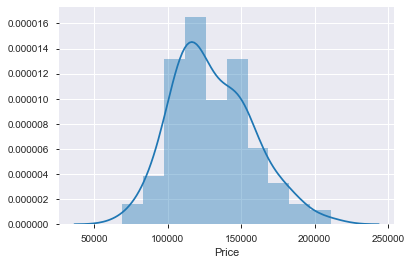

In [159]:
sns.distplot(data_final.Price,bins=10)

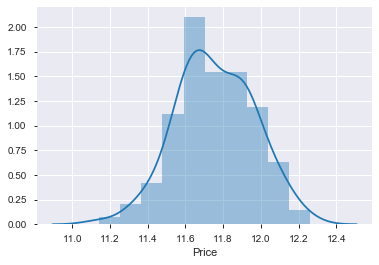

In [160]:
sns.distplot(np.log(data_final.Price))

In [161]:
data_final['lg_price']=np.log(data_final.Price)

In [162]:
data_final

,Price,SqFt,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West,Bathrooms_3,Bathrooms_4,Bedrooms_3,Bedrooms_4,Bedrooms_5,lg_price
0,114300,1790,2,0,0,0,0,0,0,0,0,11.646582
1,114200,2030,3,0,0,0,0,0,0,1,0,11.645707
2,114800,1740,1,0,0,0,0,0,1,0,0,11.650947
3,94700,1980,3,0,0,0,0,0,1,0,0,11.458469
4,119800,2130,3,0,0,0,1,0,1,0,0,11.693579
...,...,...,...,...,...,...,...,...,...,...,...,...
123,119700,1900,3,1,0,0,1,0,1,0,0,11.692744
124,147900,2160,3,1,0,0,1,0,0,1,0,11.904292
125,113500,2070,2,0,1,0,0,0,0,0,0,11.639558
126,149900,2020,1,0,0,1,1,0,1,0,0,11.917724


In [163]:
corr_mat= data_final.corr()
corr_mat.to_csv('corr_mat.csv')

In [164]:
data_final.corr()

,Price,SqFt,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West,Bathrooms_3,Bathrooms_4,Bedrooms_3,Bedrooms_4,Bedrooms_5,lg_price
Price,1.000000,0.552982,-0.313636,0.452817,-0.548221,0.714007,0.460239,0.229013,-0.183831,0.482070,0.184168,0.990868
SqFt,0.552982,1.000000,0.336923,0.079792,-0.288886,0.250759,0.497876,0.121712,-0.032125,0.361565,0.169820,0.556572
Offers,-0.313636,0.336923,1.000000,-0.144986,0.332987,-0.327425,0.195626,-0.131472,0.224185,-0.030937,-0.009241,-0.326332
Brick_Yes,0.452817,0.079792,-0.144986,1.000000,-0.260554,0.115793,0.132872,0.126976,-0.032794,-0.020495,0.180283,0.442163
Neighborhood_North,-0.548221,-0.288886,0.332987,-0.260554,1.000000,-0.479098,-0.262707,-0.064222,0.064838,-0.313125,-0.091184,-0.559956
Neighborhood_West,0.714007,0.250759,-0.327425,0.115793,-0.479098,1.000000,0.248319,0.134048,-0.183994,0.493225,0.053462,0.689422
Bathrooms_3,0.460239,0.497876,0.195626,0.132872,-0.262707,0.248319,1.000000,-0.077023,0.069862,0.246528,0.017895,0.457382
Bathrooms_4,0.229013,0.121712,-0.131472,0.126976,-0.064222,0.134048,-0.077023,1.000000,-0.092997,-0.048026,0.704317,0.192966
Bedrooms_3,-0.183831,-0.032125,0.224185,-0.032794,0.064838,-0.183994,0.069862,-0.092997,1.000000,-0.567223,-0.132039,-0.169154
Bedrooms_4,0.482070,0.361565,-0.030937,-0.020495,-0.313125,0.493225,0.246528,-0.048026,-0.567223,1.000000,-0.068188,0.466797


In [165]:
features = data_final[data_final.columns.difference( ['lg_price', 'Price'] )]
target = data_final['lg_price']

In [166]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import itertools

In [167]:
#lm = LinearRegression()
lm = RandomForestRegressor()

# create the RFE model and select 10 attributes
#recursive feature elimination
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(features, target)

In [168]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [169]:
features.columns[rfe.support_]

Index(['Bathrooms_3', 'Bathrooms_4', 'Bedrooms_3', 'Bedrooms_4', 'Bedrooms_5',
       'Brick_Yes', 'Neighborhood_North', 'Neighborhood_West', 'Offers',
       'SqFt'],
      dtype='object')

In [175]:
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(  features, target )

In [171]:
itertools.zip_longest(features.columns, F_values, p_values)

In [172]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]

In [173]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [ ]:
#list of variable from RFE
#Bathrooms_3
#bathroom_4
#Bedrooms_3
#Bedrooms_4
#bedroom_5
#Brick_Yes
#Neighborhood_North
#Neighborhood_West
#Offers
#SqFt

In [ ]:
#from f_reg
#Neighborhood_West 
#Neighborhood_North                     
#SqFt                       
#Bedrooms_4
#Bathrooms_3
#Brick_Yes
#Offers
#Bathrooms_4
#Bedrooms_3

In [ ]:
#from corr
#Neighborhood_West
#Neighborhood_North
#SqFt
#Bedrooms_4
#Bathrooms_3
#Brick_Yes
#Offers
#Bathrooms_4
#Bedrooms_3
#Bedrooms_5


In [ ]:
#common vars
#Neighborhood_West
#Neighborhood_North
#Offers
#SqFt
#Brick_Yes
#Bedrooms_4
#Bathrooms_3
#Bathrooms_4
#Bedrooms_3


In [174]:
f_reg_results.sort_values(by=['F_Value'], ascending=False, inplace=True)

In [176]:
f_reg_results.to_csv('f_reg_results2.csv')

In [247]:
#list of significant variables from f_regression
                    f_value     p_value
Neighborhood_West 114.1381724	0
Neighborhood_North 57.55333435	0
SqFt               56.54849881	0
Bedrooms_4	       35.10454014	0
Bathrooms_3	       33.33201951	0
Brick_Yes	       30.62065862	0
Offers	           15.01727691	0
Bathrooms_4	   4.873163702	0.029
Bedrooms_3	       3.711442203	0.056

#Bedrooms_5	       3.495276253	0.064



NameError: name 'Neighborhood_West' is not defined

In [ ]:
#variance inflation factor

In [227]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Final_list=[#'Neighborhood_West',
'Neighborhood_North',
#'Offers',
'SqFt',
'Brick_Yes',
'Bedrooms_4',
#'Bathrooms_3',
'Bathrooms_4',
#'Bedrooms_3',
]


In [228]:
X=features[Final_list]

In [229]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.sort_values(by='VIF_Factor', ascending=False)

,VIF_Factor,features
1,3.204703,SqFt
0,1.744874,Neighborhood_North
2,1.628963,Brick_Yes
3,1.531440,Bedrooms_4
4,1.031827,Bathrooms_4


In [230]:
train, test = train_test_split(data_final, test_size=0.3, random_state=123)

In [231]:
data_final.shape

(128, 12)

In [232]:
train.shape

(89, 12)

In [233]:
test.shape

(39, 12)

In [234]:
target

0      11.646582
1      11.645707
2      11.650947
3      11.458469
4      11.693579
         ...    
123    11.692744
124    11.904292
125    11.639558
126    11.917724
127    11.732864
Name: lg_price, Length: 128, dtype: float64

In [235]:
'lg_price ~ ' + "+".join(Final_list)

'lg_price ~ Neighborhood_North+SqFt+Brick_Yes+Bedrooms_4+Bathrooms_4'

In [239]:
formula = 'lg_price ~  Neighborhood_North+SqFt+Brick_Yes+Bedrooms_4'
#+Bathrooms_4+Offers_2'

In [240]:
ols_model = smp.ols(formula = formula, data=train).fit()

In [241]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:               lg_price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     35.26
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           2.90e-17
Time:                        18:43:09   Log-Likelihood:                 59.564
No. Observations:                  89   AIC:                            -109.1
Df Residuals:                      84   BIC:                            -96.68
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.9834      0

In [344]:
#Error metrics

In [242]:
train_predicted = np.exp(ols_model.predict(train))
test_predicted = np.exp(ols_model.predict(test))

In [243]:
train_actual = np.exp(train.lg_price)
test_actual = np.exp(test.lg_price)

In [244]:
train_RMSE = np.sqrt(np.mean(np.square(train_actual-train_predicted)))
test_RMSE  = np.sqrt(np.mean(np.square(test_actual-test_predicted)))

In [245]:
print(train_RMSE)
print(test_RMSE)

15880.868416666868
16879.221957581325


In [246]:
train_MAPE = np.mean(np.abs(train_actual-train_predicted)/train_actual)
test_MAPE  = np.mean(np.abs(test_actual-test_predicted)/test_actual)
print(train_MAPE)
print(test_MAPE)

0.10108044193426662
0.11173757850793113


In [247]:
train_RMSPE = np.sqrt(np.mean(np.square((train_actual-train_predicted)/train_actual)))
test_RMSPE  = np.sqrt(np.mean(np.square((test_actual-test_predicted)/test_actual)))
print(train_RMSPE)
print(test_RMSPE)

0.12654091613114746
0.13005434236654415


In [248]:
np.corrcoef(train_actual, train_predicted)

array([[1.        , 0.80348427],
       [0.80348427, 1.        ]])

In [249]:
np.corrcoef(test_actual, test_predicted)

array([[1.        , 0.78388313],
       [0.78388313, 1.        ]])

In [250]:
train_errors = train_actual-train_predicted
test_errors = test_actual-test_predicted

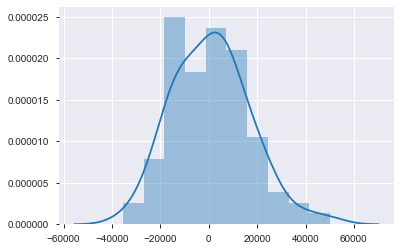

In [251]:
sns.distplot(train_errors)

In [252]:
np.corrcoef(train_actual, train_errors)

array([[1.        , 0.61585777],
       [0.61585777, 1.        ]])

In [253]:
#Decile analysis
train_results = pd.concat([train_actual, train_predicted], axis=1)
test_results = pd.concat([test_actual, test_predicted], axis=1)

In [254]:
train_results.columns = ['actual', 'pred']
test_results.columns = ['actual', 'pred']

In [255]:
train_results['Deciles']=pd.qcut(train_results['pred'],10, labels=False)

In [256]:
test_results['Deciles']=pd.qcut(test_results['pred'],10, labels=False)

In [257]:
train_results.groupby(['Deciles']).apply(mean)[['actual','pred']]

,actual,pred
Deciles,,
0,99877.777778,98498.675221
1,110111.111111,105176.095161
2,107411.111111,109420.540901
3,116233.333333,114110.330399
4,114577.777778,120080.761032
5,128388.888889,127731.015622
6,146000.000000,135046.605125
7,141222.222222,140569.074109
8,141320.000000,146325.224228


In [258]:
test_results.groupby(['Deciles']).apply(mean)[['actual','pred']]

,actual,pred
Deciles,,
0,100725.000000,95818.001166
1,116750.000000,107670.545961
2,117925.000000,115199.741152
3,131300.000000,123528.206492
4,133350.000000,131464.845906
5,146466.666667,139264.369990
6,146050.000000,145825.673355
7,159250.000000,150411.297335
8,164700.000000,167547.815170


In [259]:
import pickle

# now you can save it to a file
with open('ols_model.pkl', 'wb') as f:
    pickle.dump(ols_model, f)

In [260]:
with open('ols_model.pkl', 'rb') as f:
    model_new = pickle.load(f)

In [261]:
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:               lg_price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     35.26
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           2.90e-17
Time:                        18:43:53   Log-Likelihood:                 59.564
No. Observations:                  89   AIC:                            -109.1
Df Residuals:                      84   BIC:                            -96.68
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.9834      0